In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
teams = pd.read_csv('/Users/anthonyzippay/Desktop/BaseballData/baseballdatabank-master/core/teams.csv')

In [3]:
teams.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [4]:
teams.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                float64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

In [5]:
teams2 = teams[['IPouts', 'W', 'yearID', 'teamID']]

In [6]:
teams2.shape

(2925, 4)

In [7]:
teams3 = teams2[teams2['yearID'] >= 1995] 

In [8]:
teams3.head()

,IPouts,W,yearID,teamID
2181,3875,90,1995,ATL
2182,3801,71,1995,BAL
2183,3878,86,1995,BOS
2184,3853,78,1995,CAL
2185,3854,68,1995,CHA


In [9]:
teams3.shape

(744, 4)

In [10]:
teams4 = teams3.dropna(how = 'all')

In [11]:
def assign_win_bins(W):
    if W <= 50 and W <= 69:
        return 1
    if W >= 70 and W <= 89:
        return 2
    if W >= 90 and W <= 116:
        return 3

In [12]:
teams4.head()

,IPouts,W,yearID,teamID
2181,3875,90,1995,ATL
2182,3801,71,1995,BAL
2183,3878,86,1995,BOS
2184,3853,78,1995,CAL
2185,3854,68,1995,CHA


In [13]:
teams4['Winbins'] = teams4['W'].apply(assign_win_bins)

In [14]:
teams4.max()

IPouts     4485
W           116
yearID     2019
teamID      WAS
Winbins       3
dtype: object

In [15]:
def year_bins(yearID):
    if yearID <= 1999:
        return 1
    if yearID >= 2002 and yearID <= 2007:
        return 2
    if yearID >= 2008 and yearID <= 2013:
        return 3
    if yearID >= 2014 and yearID <= 2019:
        return 4

In [16]:
teams4['yearBins'] = teams4['yearID'].apply(year_bins)

In [17]:
teams4.describe()

,IPouts,W,yearID,Winbins,yearBins
count,744.000000,744.000000,744.000000,596.000000,684.000000
mean,4318.978495,80.627688,2007.088710,2.317114,2.578947
std,99.128977,11.788962,7.176317,0.476446,1.092190
min,3797.000000,43.000000,1995.000000,1.000000,1.000000
25%,4305.000000,72.000000,2001.000000,2.000000,2.000000
50%,4333.000000,80.000000,2007.000000,2.000000,3.000000
75%,4361.000000,90.000000,2013.000000,3.000000,4.000000
max,4485.000000,116.000000,2019.000000,3.000000,4.000000


In [18]:
teams4.head()

,IPouts,W,yearID,teamID,Winbins,yearBins
2181,3875,90,1995,ATL,3.0,1.0
2182,3801,71,1995,BAL,2.0,1.0
2183,3878,86,1995,BOS,2.0,1.0
2184,3853,78,1995,CAL,2.0,1.0
2185,3854,68,1995,CHA,NaN,1.0


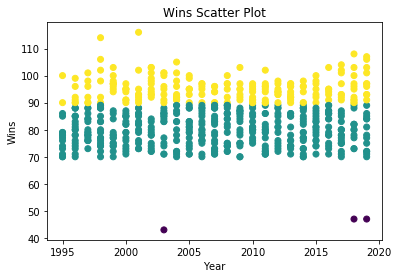

In [19]:
plt.scatter(teams4['yearID'], teams4['W'], c=teams4['Winbins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

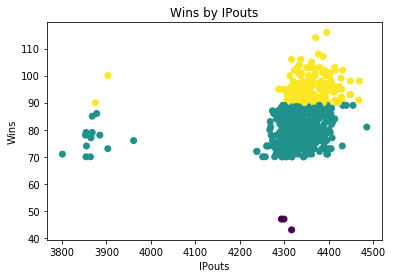

In [20]:
plt.scatter(teams4['IPouts'], teams4['W'], c=teams4['Winbins'])
plt.title('Wins by IPouts')
plt.xlabel('IPouts')
plt.ylabel('Wins')

plt.show()

In [23]:
x = teams4['yearBins']
y = teams4['Winbins']

In [24]:
logit = sm.Logit(y,x)
results = logit.fit()
print(results.summary2())

MissingDataError: exog contains inf or nans

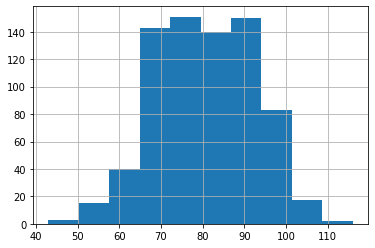

In [25]:
teams4.W.hist()

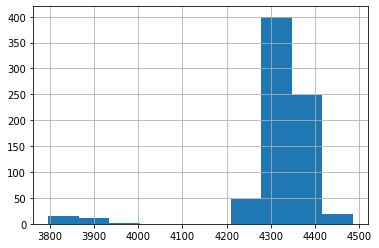

In [26]:
teams4.IPouts.hist()

In [27]:
teams4.dropna(inplace=True)

In [28]:
teams5 = teams4.drop(columns=['teamID', 'W', 'yearID'])

In [29]:
x = teams5.drop('Winbins', axis=1)
y = teams5['Winbins']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [31]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=76, verbose=0,
                       warm_start=False)

In [32]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[ 0  1  0]
 [ 0 91 16]
 [ 0 43 14]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.67      0.85      0.75       107
         3.0       0.47      0.25      0.32        57

    accuracy                           0.64       165
   macro avg       0.38      0.37      0.36       165
weighted avg       0.60      0.64      0.60       165



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
teams5.Winbins.value_counts()

2.0    371
3.0    176
1.0      3
Name: Winbins, dtype: int64

### 64% accurate at predicting Wins?

In [34]:
feature_importances = pd.DataFrame(forest.feature_importances_, index=X.columns).rename(columns={0:'importance'})
feature_importances2 = feature_importances.loc[[x for x in feature_importances.index if 'teamID' not in x],:].reset_index().rename(columns={'index':'feature'})

NameError: name 'X' is not defined

In [ ]:
team_importance =feature_importances.loc[[x for x in feature_importances.index if 'teamID' in x],:]['importance'].sum()

In [ ]:
feature_importances2 = feature_importances2.append({"feature":'Team','importance':team_importance},ignore_index=True)

In [ ]:
feature_importances2.sort_values(by='importance',inplace=True, ascending=False)
feature_importances2.plot(kind='barh', figsize=(7,6), x='feature')

In [ ]:
x = teams5.drop('yearBins', axis=1)
y = teams5['yearBins']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [ ]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

In [ ]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

### 27% accurate at predicting Yearbins?

### Winbins, 1 = less than 50 wins, 2=50-69 wins, 3=70-89 wins, 4=90-109 wins, 5=110 or more wins
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5

### Yearbins, 
    if yearID <= 1999:
        return 1
    if yearID >= 2002 and yearID <= 2007:
        return 2
    if yearID >= 2008 and yearID <= 2013:
        return 3
    if yearID >= 2014 and yearID <= 2019:
        return 4

In [ ]:
forest.feature_importances_

In [ ]:
teams5.head()